# Homework 5: This or Physics Hack Day

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 16    

Henry Casarez

**Important**: This homework is optional **if** you participate in Physics Hack Day:  
http://theory.ucr.edu/PhysicsHackDay/

If you do so, please delete all of the cells below and replace it with a link to the Physics Hack Day GitHub repository to which you contributed. 


## Problem 1: Double Pendulum

In this problem, you will extend the simple pendulum in <a href="https://github.com/Physics177-2017/Homework04">Homework 4</a> to a <a href="https://en.wikipedia.org/wiki/Double_pendulum">double pendulum</a>.

<img src="hw5pendulum.png">  
Image from <a href="https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg">Wikimedia Commons</a>

Assume no forces other than gravity. Do not assume the small angle approximation. 

Plot the trajectory of the double pendulum for a few different initial conditions. Your goal is to reproduce the cool-looking trajectories in the  <a href="https://en.wikipedia.org/wiki/Double_pendulum">Wikipedia article</a>, for example:

<img src="hw5_doublepic.jpg">

** Update (5/15) **: you may use the equations of motion from exercise 8.14 of the book. This assumes equal masses and equal length pendulum rods.

<img src="HW5_EOM.png">

** Check **: for the following parameters:

`g = 9.8`  
`dt = 0.01`  


`L1 = 1.0`  
`L2 = 1.0`  
`m1 = 1.0`  
`m2 = 1.0`  

`omega1_init = 0.0`  
`omega2_init = 0.0`

I obtained:

<img src="HW5_Prob1.png">

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin as sin
from math import cos as cos

# CONSTANTS
g = 9.8    

# PARAMETERS
ell1= 1.0      # length of pendulum arm
ell2= 1.0
m1=1.0
m2=1.0
theta1_init=-90.0  # initial displacement in radians
               # Note: this is *not* a small angle
theta2_init=2.0
omega1_init = 0.0
omega2_init = 0.0
# initial angular velocity
dt = 0.00001      # time sampling spacing
t_final = 5.0 # total number of seconds to run

def f(theta, theta2, omega, omega2, t):
    """d(theta)/dt"""
    return omega # FIX THIS
def f2(theta, theta2, omega, omega2, t):
    """d(theta)/dt"""
    return omega2 # FIX THIS
    
def h(theta, theta2, omega, omega2, t):
    """d(omega)/dt"""
    return (-1*omega**2*(sin(2*theta-2*theta2))+ 2*omega2**2*(sin(theta-theta2))+(g/ell1)*((sin(theta-2*theta2))+3*sin(theta)))/(3-cos(2*theta-2*theta2)) 
# FIX THIS
def h2(theta, theta2, omega, omega2, t):
    """d(omega)/dt"""
    return (4*omega**2*(sin(theta-theta2))+ omega2**2*(sin(2*theta-2*theta2))+2*(g/ell2)*((sin(2*theta-theta2))-sin(theta2)))/(3-cos(2*theta-2*theta2)) # FIX THIS

# TIME SLICES (depends on dt and t_final)
tpoints = np.arange(0, t_final, dt)

def time_and_angles():
    """
    Returns three Numpy arrays: 
    1. a list of time samples 
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    """
    
    theta_points = []
    omega_points = []
    theta2_points= []
    omega2_points= [] 
    
    # Initialize theta, omega
    theta = theta1_init # FIX THIS
    omega = omega1_init # FIX THIS
    theta2= theta2_init
    omega2= omega2_init

    theta_half = theta1_init + .5*dt*f(theta1_init,theta2_init, omega1_init,omega2_init,0) # FILL THIS IN USING ONE STEP OF THE EULER METHOD
    omega_half = omega1_init + .5*dt*h(theta1_init,theta2_init, omega1_init,omega2_init,0)
        
    theta2_half = theta2_init + .5*dt*f2(theta1_init,theta2_init, omega1_init,omega2_init,0) # FILL THIS IN USING ONE STEP OF THE EULER METHOD
    omega2_half = omega2_init + .5*dt*h2(theta1_init,theta2_init, omega1_init,omega2_init,0)
        
    for t in tpoints:
        
        theta_points.append(theta)
        omega_points.append(omega)
        theta2_points.append(theta2)
        omega2_points.append(omega2)
        
        theta += dt*f(theta_half,theta2_half, omega_half, omega2_half, t+ .5*dt)
        theta_half += dt*f(theta,theta2, omega,omega2, t+dt)
    
        omega += dt*h( theta_half,theta2_half, omega_half, omega2_half, t+ .5*dt)
       
        

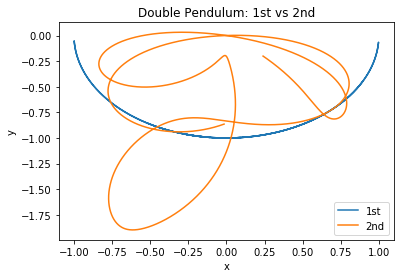

In [59]:
x1= ell1*(np.sin(thetas_lf))
y1=-ell1*(np.cos(thetas_lf))
x2=ell1*np.sin(thetas_lf) + ell2*np.sin(thetas2_lf)
y2=-ell1*np.cos(thetas_lf)- ell2*np.cos(thetas2_lf)

plt.plot(-x1, -y1 , label='1st')
plt.plot(-x2, -y2 , label='2nd')
plt.title("Double Pendulum: 1st vs 2nd")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

I mean better than nothing hahahaha

## Problem 1, extra credit:

I think the double pendulum trajectories are really neat. They're a very simple system with surprisingly complex behavior. (Maybe it's just surprising to me?) For extra credit (or for inspiration for Physics Hack Day), consider some of the following:

* Make an animation of the double pendulum trajectory. You can simultaneously animate the trajectories of both weights, see <a href="https://en.wikipedia.org/wiki/Double_pendulum#/media/File:Trajektorie_eines_Doppelpendels.gif">this  example</a>. 
* In your animation above, can you also do the "gradual fading" of the older trajectory points that is demonstrated in the example?
* Here's something really cool: can you **sonify** the trajectory? Map the *velocity* of the mass to a pitch and then play the pitch as the pendulum moves. In this way, you model the *Doppler shift* of a buzzer attached to the double pendulum. You can find an example of the implementation of the `scipy` sound library <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">here</a>... which is itself a fantastic example of a Jupyter notebook in Nobel-prize-worthy research.
* Triple pendulum?! (If you need inspiration: https://www.youtube.com/watch?v=OQSNhk5ICTI) ... *no, it turns out that this is really hard.*

## Problem 2: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density.

This is similar to the <a href="https://github.com/Physics177-2017/Lec11-PDE/blob/master/Lecture%2011%20Preview.ipynb">Lecture 11</a> demo, except that now there are source charges. 

Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW5_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be.

In [73]:
import numpy as np

# Constants
M = 9        # grid squares per side
V = 1.0        # Voltage at the top
target = 1e-2  # target accuracy

# arrays
phi = np.zeros([M+1,M+1],float) # initialize

phi[2,2] = -1.
phi[3,2] = -1.
phi[3,3] = -1.
phi[2,3] = -1.

phi[6,6] = 1.
phi[6,7] = 1.
phi[7,7] = 1.
phi[7,6] = 1.




phiprime = np.zeros([M+1, M+1],float) # container for new values

print(phi)


# Main Loop
delta = 1.0
while delta > target:
    # calculate new values of the potential

    for i in range(M+1):
        for j in range(M+1):

            # if boundary
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4.
    
    # NOTE: indentation is very important!
    # convergence check
    delta = np.max(np.abs(phi-phiprime))
            
    # swap arrays
    phi, phiprime = phiprime, phi




[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


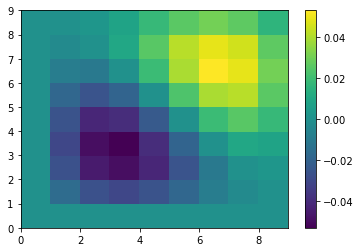

In [74]:
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(M+1),np.arange(M+1))
plt.pcolormesh(xx,yy,phi)
plt.colorbar()
plt.show()